In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
%matplotlib notebook

import time

%load_ext autoreload
%autoreload 2

In [2]:
from loadbackprojection import *

In [3]:
libraryFilename = "ccpp/libbackprojection/liblibbackprojection.so"

In [4]:
lib = LibBackProjection( libraryFilename )

# Interpolation

In [5]:
Nx = 3000

xp = np.linspace(-10*np.pi, 10*np.pi, Nx)
dx = xp[1] - xp[0]
fp = Nx * np.sin(xp) + 1j * np.arange(Nx)

In [10]:
x = np.linspace(-np.pi/10, np.pi/10, 100)
y = np.zeros( x.shape, dtype=complex )
idx = 0
for val in x:
    aux = lib.so.interp( val, xp, fp, dx )
    y[idx] = aux.real + aux.imag
    idx += 1

In [11]:
x = 0.5
y = lib.so.interp( x, xp, fp, dx )

In [12]:
dx

0.020950934668821475

In [13]:
y.real, y.imag

(1438.2031783591765, 1523.3652837166296)

<IPython.core.display.Javascript object>


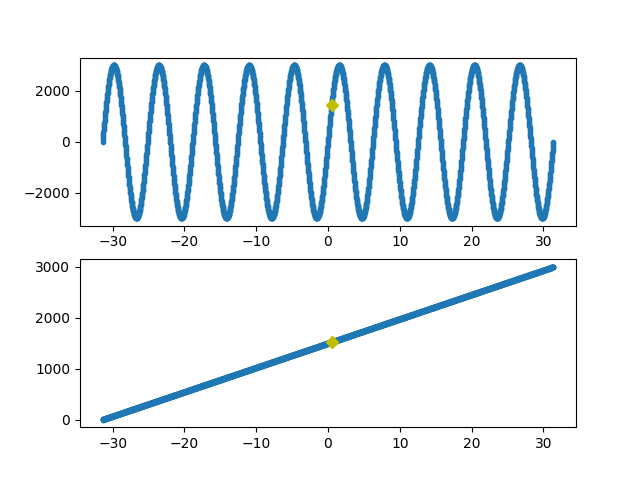

In [14]:
plt.figure()
plt.subplot(211)
plt.plot( xp, np.real(fp), '.-' )
plt.plot( x, y.real, 'Dy' )
plt.subplot(212)
plt.plot( xp, np.imag(fp), '.-' )
plt.plot( x, y.imag, 'Dy' )

# Resampling

## With ctypes

In [15]:
Nx = 3000
upSampling = 10
Ny = Nx * upSampling

teta = np.linspace(-10*np.pi, 10*np.pi, Nx)
x = Nx * np.sin(teta) + 1j * np.arange(Nx)
fftx = np.zeros( Nx, dtype=complex )
y = np.zeros( Ny, dtype=complex )
ffty = np.zeros( y.shape, dtype=complex )

In [16]:
import timeit
import time

In [17]:
#%timeit signal.resample( x, Ny )

In [18]:
lib.reload()

In [19]:
#%timeit mydll.resample( x, fftx, Nx, y, ffty, Ny )
lib.so.resample( x, fftx, Nx, y, ffty, Ny )

1500

<IPython.core.display.Javascript object>


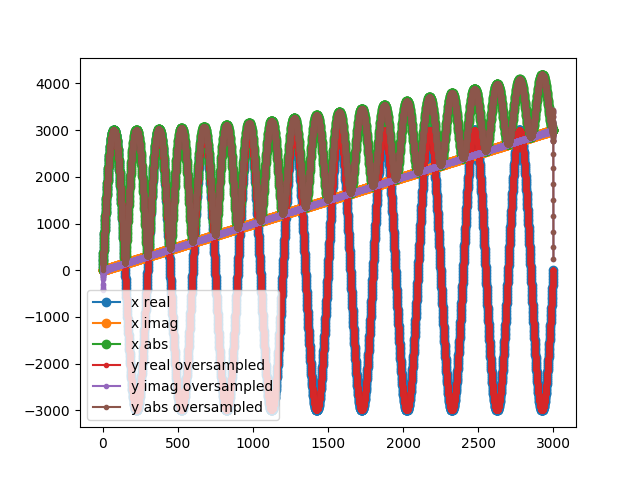

In [20]:
tx = np.arange(Nx)
ty = np.arange(Ny)/upSampling

plt.figure()

plt.plot(tx, np.real(x), 'o-', label="x real")
plt.plot(tx, np.imag(x), 'o-', label="x imag")
plt.plot(tx, np.abs(x), 'o-',label="x abs")

plt.plot(ty, np.real(y), '.-', label="y real oversampled")
plt.plot(ty, np.imag(y), '.-', label="y imag oversampled")
plt.plot(ty, np.abs(y), '.-', label="y abs oversampled")

plt.legend()

<IPython.core.display.Javascript object>


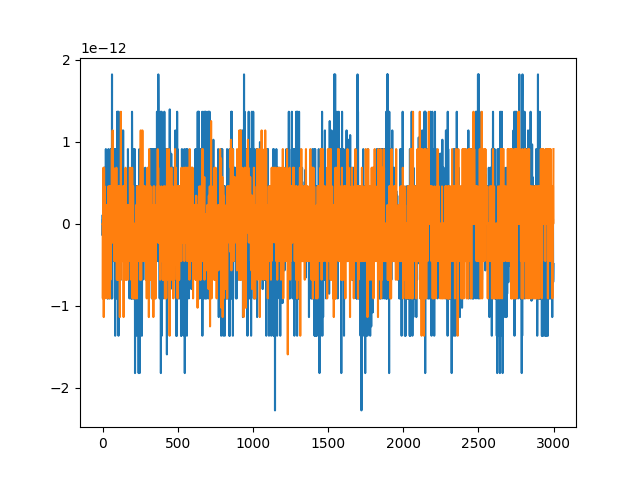

In [21]:
plt.figure()
plt.plot( np.real(x) - np.real(y[::upSampling]) )
plt.plot( np.imag(x) - np.imag(y[::upSampling]) )

## Other resampling

In [22]:
lib.reload()

In [23]:
# compare resample4 (exact) with resample4b (vec_ind is not correct)
fftx = np.fft.fft( x )
lib.so.resample4b( fftx, Nx, y, ffty, Ny )

1501

<IPython.core.display.Javascript object>


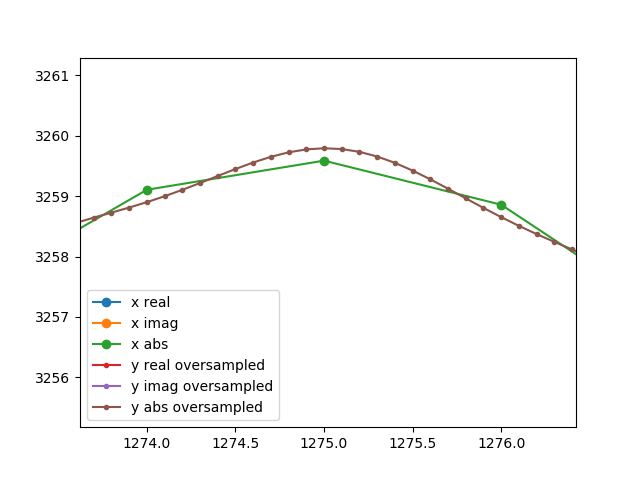

In [24]:
tx = np.arange(Nx)
ty = np.arange(Ny)/upSampling

plt.figure()

plt.plot(tx, np.real(x), 'o-', label="x real")
plt.plot(tx, np.imag(x), 'o-', label="x imag")
plt.plot(tx, np.abs(x), 'o-',label="x abs")

plt.plot(ty, np.real(y), '.-', label="y real oversampled")
plt.plot(ty, np.imag(y), '.-', label="y imag oversampled")
plt.plot(ty, np.abs(y), '.-', label="y abs oversampled")

plt.legend()

<IPython.core.display.Javascript object>


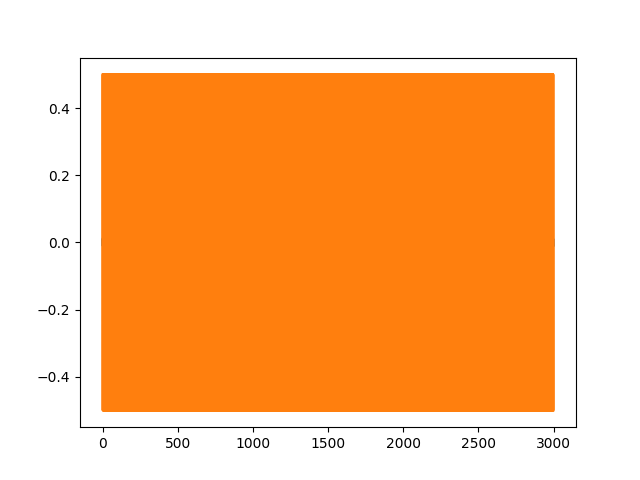

In [25]:
plt.figure()
plt.plot( np.real(x) - np.real(y[::upSampling]) )
plt.plot( np.imag(x) - np.imag(y[::upSampling]) )

## With numpy

In [ ]:
nbPoints = 1000
teta = np.linspace(-10*np.pi, 10*np.pi, nbPoints)
a = nbPoints * np.sin(teta) + 1j * np.arange(nbPoints)

In [ ]:
plt.figure()
plt.plot(np.real(a), label="real")
plt.plot(np.imag(a), label="imag")
plt.plot(np.abs(a), label="abs")
plt.legend()

In [ ]:
fft_a = np.fft.fft(a)
upSampling = 4

In [ ]:
fft_b = np.zeros(fft_a.shape[0]*upSampling, dtype=complex)
nbPoints2 = int( nbPoints / 2 ) + nbPoints%2
fft_b[0:nbPoints2] = fft_a[0:nbPoints2]
fft_b[-nbPoints2:] = fft_a[-nbPoints2:]
b = np.fft.ifft( fft_b ) * 4

In [ ]:
ta = np.arange(nbPoints)
tb = np.arange(nbPoints*upSampling)/upSampling

plt.figure()

plt.plot(tb, np.real(b), 'o', label="b real")
plt.plot(tb, np.imag(b), 'o', label="b imag")
plt.plot(tb, np.abs(b), 'o',label="b abs")

plt.plot(ta, np.real(a), '.-', label="a real")
plt.plot(ta, np.imag(a), '.-', label="a imag")
plt.plot(ta, np.abs(a), '.-', label="a abs")

plt.legend()

In [ ]:
a = np.zeros(4)

In [ ]:
a[0] = 0
a[1] = 1
a[2] = 0
a[3] = 0

In [ ]:
a

In [ ]:
ffta = np.fft.fft(a)

In [ ]:
ffta

In [ ]:
plt.figure()
plt.plot(np.angle(ffta))